# Introduction

In [41]:
import scipy.signal as signal
import matplotlib.pyplot as plt
import skimage.util
import scipy.ndimage as ndimage
from skimage.color import rgb2gray
from skimage.io import imread
import numpy as np

In [42]:
plt.gray()
lena= rgb2gray(imread('lena.tiff'))
cameraman = imread('cameraman.tiff').astype(np.float64)/255

<Figure size 640x480 with 0 Axes>

In [43]:
def gaussian_filter(n_rows: int, n_cols: int, stdv: float):
    """
    Returns a 2d Gaussian image filter.
    """
    g_r = signal.windows.gaussian(n_rows, stdv)
    g_c = signal.windows.gaussian(n_cols, stdv)

    G = np.outer(g_r, g_c)

    return G/np.sum(G)

def PSNR(f: np.ndarray, g: np.ndarray):
    return 10*np.log10(1.0/ np.mean(np.square(f-g)))


In [44]:
h1 = (1/6)*np.ones((1,6))
h2 = h1.T
h3 = np.array([[-1, 1]])

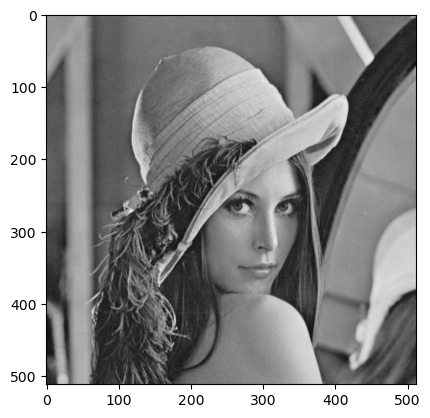

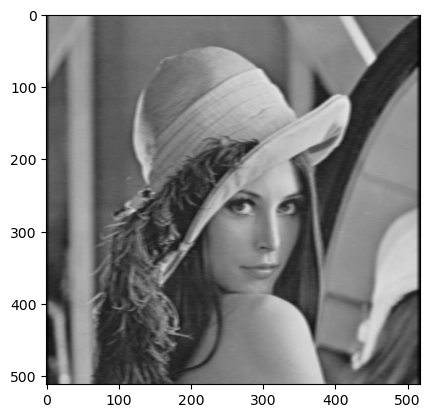

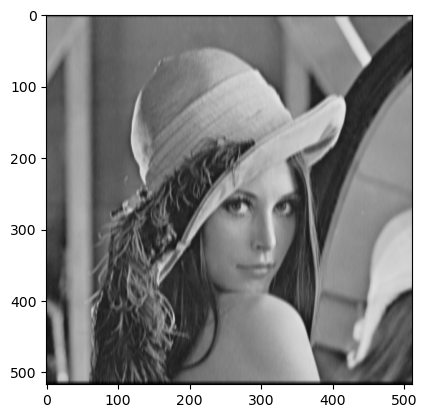

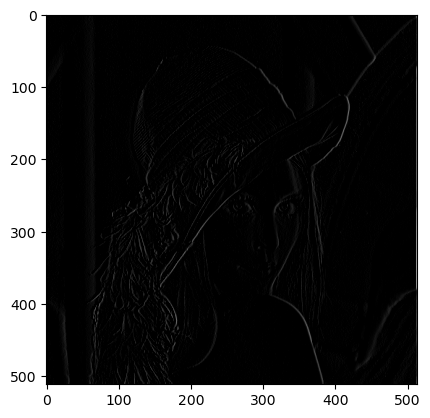

In [45]:
#convolve lena with impulse functions
lena_h1 = signal.convolve2d(lena, h1)
lena_h2 = signal.convolve2d(lena, h2)
lena_h3 = signal.convolve2d(lena, h3)

#plot lena and convolved lena
plt.imshow(lena, cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imshow(lena_h1, cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imshow(lena_h2, cmap='gray', vmin=0, vmax=1)
plt.show()
plt.imshow(lena_h3, cmap='gray', vmin=0, vmax=1)
plt.show()


In [46]:
h1 = (1/6)*np.ones((1,6))
h2 = h1.T
h3 = np.array([[-1, 1]])

# Noise Generation

base


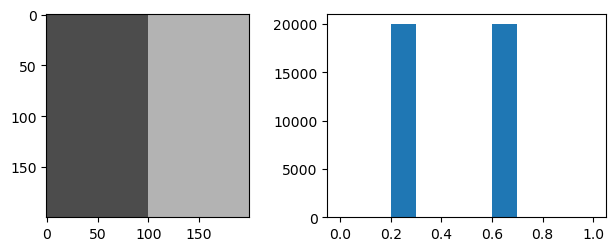

gauss


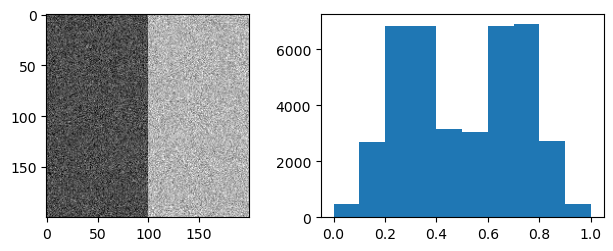

snp


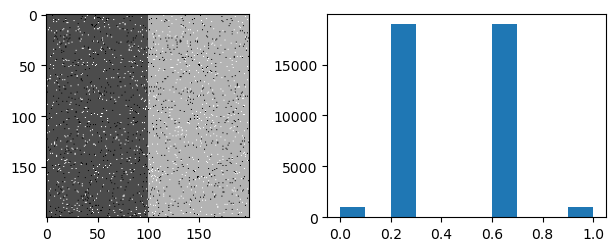

speckle


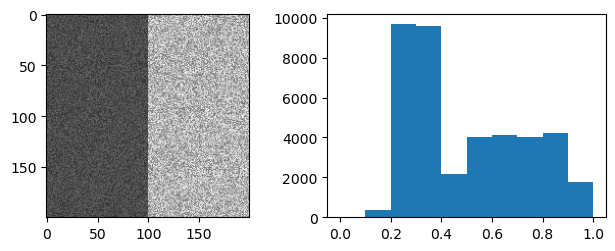

In [47]:
base_toy = np.hstack([0.3*np.ones((200,100)), 0.7*np.ones((200,100))])

def plot_im_hist(image: np.ndarray):
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray', vmin=0, vmax=1)
    plt.subplot(2, 2, 2)
    plt.hist(image.flatten(), range=(0, 1))
    plt.tight_layout()
    plt.show()

def imnoise_speckle(im, v):
    # im: input image
    # v: variance
    n = np.sqrt(v*12) * (np.random.rand(im.shape[0], im.shape[1]) - 0.5)
    return im + im * n

#additive zero-mean Gaussian (with variance of 0.01)
gauss_toy = skimage.util.random_noise(base_toy, mode='gaussian', clip=True, var=0.01)
# #salt and pepper (with noise density of 0.05)
snp_toy = skimage.util.random_noise(base_toy, mode='s&p', amount=0.05)
# multiplicative speckle noise (with variance of 0.04)
speckle_toy = imnoise_speckle(base_toy, 0.04)

#plot noisy images and corres. histograms
print("base")
plot_im_hist(base_toy)
print("gauss")
plot_im_hist(gauss_toy)
print("snp")
plot_im_hist(snp_toy)
print("speckle")
plot_im_hist(speckle_toy)


noisy_lena 26.981189244713395


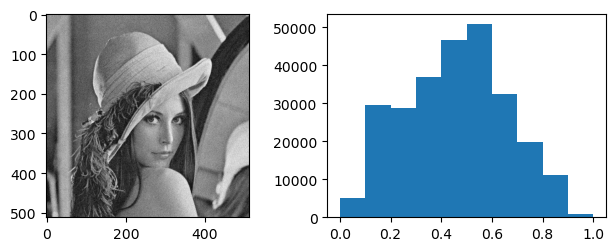

3x3 filter


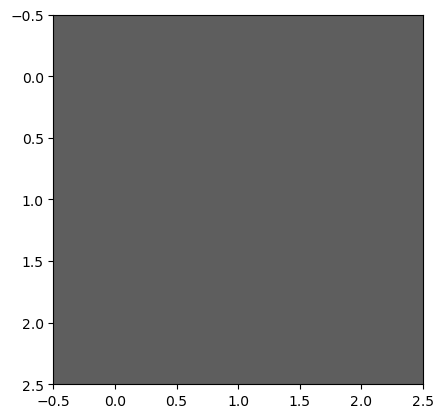

avg_lena (3x3) 31.592115352262585


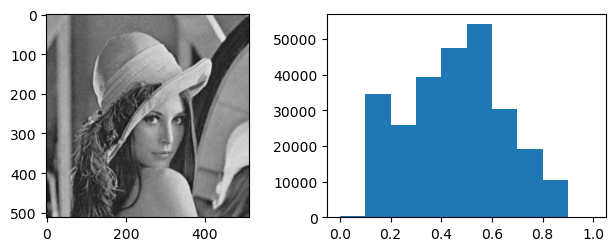

avg_lena (7x7) 27.0505631198983


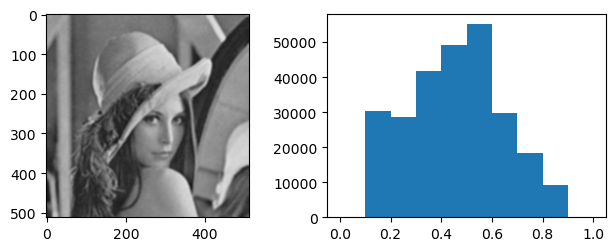

7x7 filter


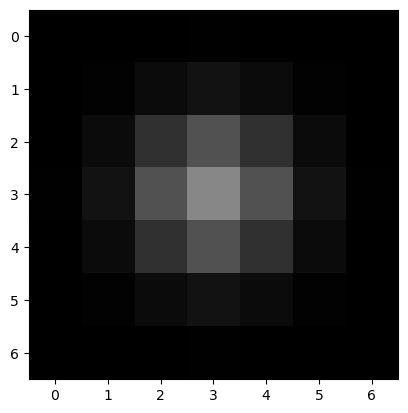

gauss_lena 31.59497021208673


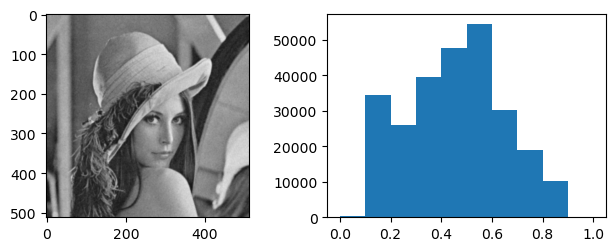

In [48]:
#Part 4

#contaminate the Lena image with zero-mean Gaussian noise with a variance of 0.002. Plot the noisy image and the corresponding histogram and PSNR between the noisy image and the original noise-free
#image

#zero mean gaussian noise var=0.002
noisy_lena = skimage.util.random_noise(lena, mode='gaussian', clip=True, var=0.002)

#plot image, histogram, PSNR
print("noisy_lena", PSNR(lena, noisy_lena))
plot_im_hist(noisy_lena)

#3x3 averaging filter kernel
kernel3x3 = np.ones((3,3))/(3.0*3.0)
#plot filter
print("3x3 filter")
plt.imshow(kernel3x3, cmap='gray', vmin=0, vmax=.3)
plt.show()
#apply averaging filter to noisy image
avg_lena = ndimage.convolve(noisy_lena, kernel3x3)
#plot denoised image and histogram
print("avg_lena (3x3)", PSNR(lena, avg_lena))
plot_im_hist(avg_lena)

#7x7 averaging filter kernel
kernel7x7 = np.ones((7,7))/(7.0*7.0)
#apply averaging filter to noisy image
avg_lena = ndimage.convolve(noisy_lena, kernel7x7)
#plot denoised image and histogram
print("avg_lena (7x7)", PSNR(lena, avg_lena))
plot_im_hist(avg_lena)

#7x7 gaussian filter kernel with SD 1
kernel_gaussian = gaussian_filter(7,7,1)
#plot the filter
print("7x7 filter")
plt.imshow(kernel_gaussian, cmap='gray', vmin=0, vmax=.3)
plt.show()
#apply gaussian filter to noisy image
gauss_lena = ndimage.convolve(noisy_lena, kernel_gaussian)
#plot denoised image and histogram
print("gauss_lena", PSNR(lena, gauss_lena))
plot_im_hist(gauss_lena)

salty lena 18.34935146983682


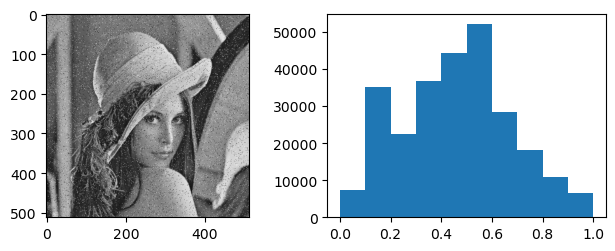

salty_avg_lena 26.138216416243488


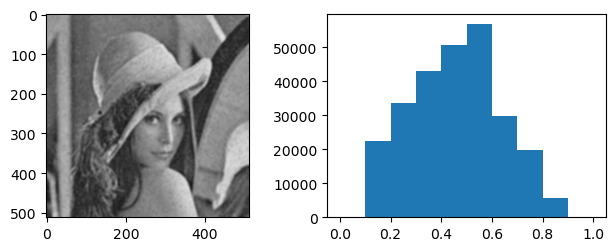

salty_gauss_lena 27.279735797925817


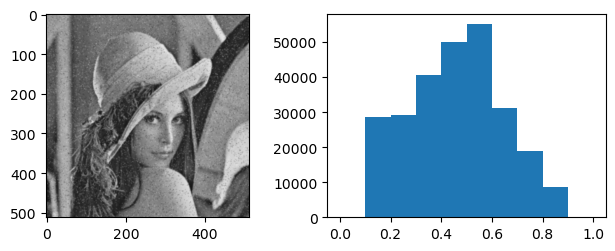

In [52]:
#create a new noisy image by adding salt and pepper noise (density 0.05) to the image
salty_lena = skimage.util.random_noise(lena, mode='s&p', amount=0.05)
#Apply the 7×7 averaging filter and the Gaussian filter to the noisy image separately
salty_avg_lena = ndimage.convolve(salty_lena, kernel7x7)
salty_gauss_lena = ndimage.convolve(salty_lena, kernel_gaussian)
#plot the noisy image, the denoised images using each method, and the corresponding histograms
print("salty lena", PSNR(salty_lena, lena))
plot_im_hist(salty_lena)
print("salty_avg_lena", PSNR(salty_avg_lena, lena))
plot_im_hist(salty_avg_lena)
print("salty_gauss_lena", PSNR(salty_gauss_lena, lena))  
plot_im_hist(salty_gauss_lena)

Median filter of S&P lena 34.33781136263412


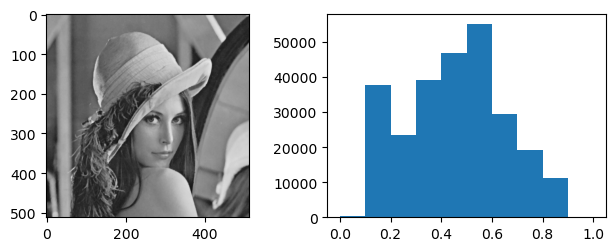

In [55]:
# Median Filtering
medianed_lena = ndimage.median_filter(salty_lena, (3, 3))
print("Median filter of S&P lena", PSNR(medianed_lena, lena))
plot_im_hist(medianed_lena)

Gaussian camera man


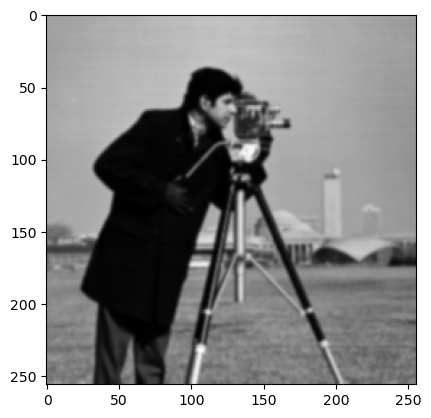

Subtracted camera man


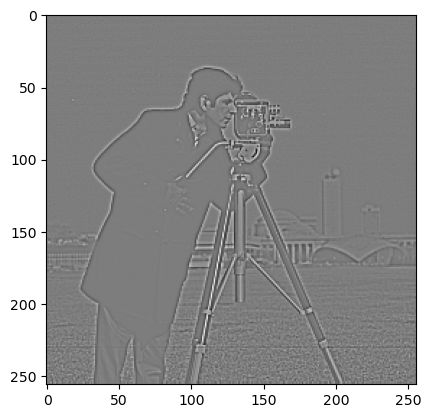

Added camera man


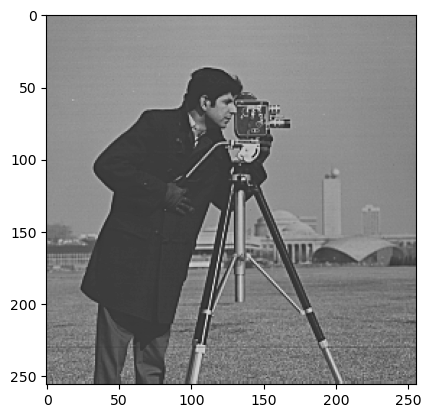

0.5x Added camera man


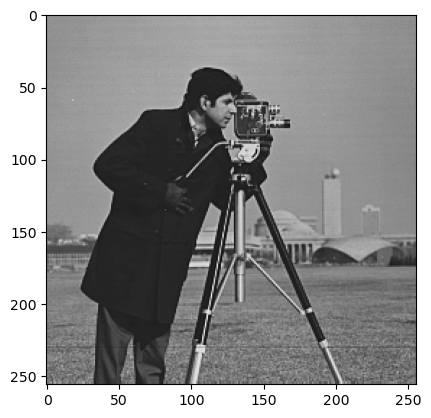

In [56]:
#Part 5
#apply gaussian filter
gauss_cameraman = ndimage.convolve(cameraman, gaussian_filter(7,7,1))
#subtract gaussian filtered image from original image
subtracted_cameraman = cameraman - gauss_cameraman
#plot both images
print("Gaussian camera man")
plt.imshow(gauss_cameraman)
plt.show()
print("Subtracted camera man")
plt.imshow(subtracted_cameraman)
plt.show()

#Now we add the subtracted image to the original image. Plot the resulting image.
added_cameraman = cameraman + subtracted_cameraman
print("Unsharp masking camera man")
plt.imshow(added_cameraman)
plt.show()

#Now, instead of adding the subtracted image to the original image, multiply the subtracted image by 0.5 and
# then add it to the original image. Plot the resulting image
multiplied_cameraman = cameraman + (0.5*subtracted_cameraman)
print("Unsharp masking camera man (scaled by 0.5x)")
plt.imshow(multiplied_cameraman)
plt.show()